## Metabolic Syndrome Risk Prediction
#This project aims to build a predictive model to assess the risk of Metabolic Syndrome using demographic, biometric, and lifestyle data. The goal is to assist healthcare providers in early identification and intervention.


In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
import pickle

In [15]:
# metabolic_risk_data.csv1. LOAD DATA
df = pd.read_csv('metabolic_risk_data.csv')


In [17]:
# EXPLORE
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [19]:
df.tail()


,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1
2400,71915,60,Male,Single,6200.0,White,106.6,27.5,0,12.82,5.2,91,36,226,1


In [21]:
df.isnull().sum().sort_values(ascending=False).head()

Marital      208
Income       117
WaistCirc     85
BMI           26
Sex            0
dtype: int64

In [23]:
# Select important columns
df = pd.read_csv("metabolic_risk_data.csv")
df = df[['Age', 'Sex', 'BMI', 'BloodGlucose', 'Triglycerides', 'MetabolicSyndrome']]
df.dropna(inplace=True)


In [25]:
#Clean and Prepare Data
df.rename(columns={
    'Age': 'age',
    'Sex': 'sex',
    'BMI': 'bmi',
    'BloodGlucose': 'glucose',
    'Triglycerides': 'triglycerides',
    'MetabolicSyndrome': 'metabolic_syndrome'
}, inplace=True)

df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

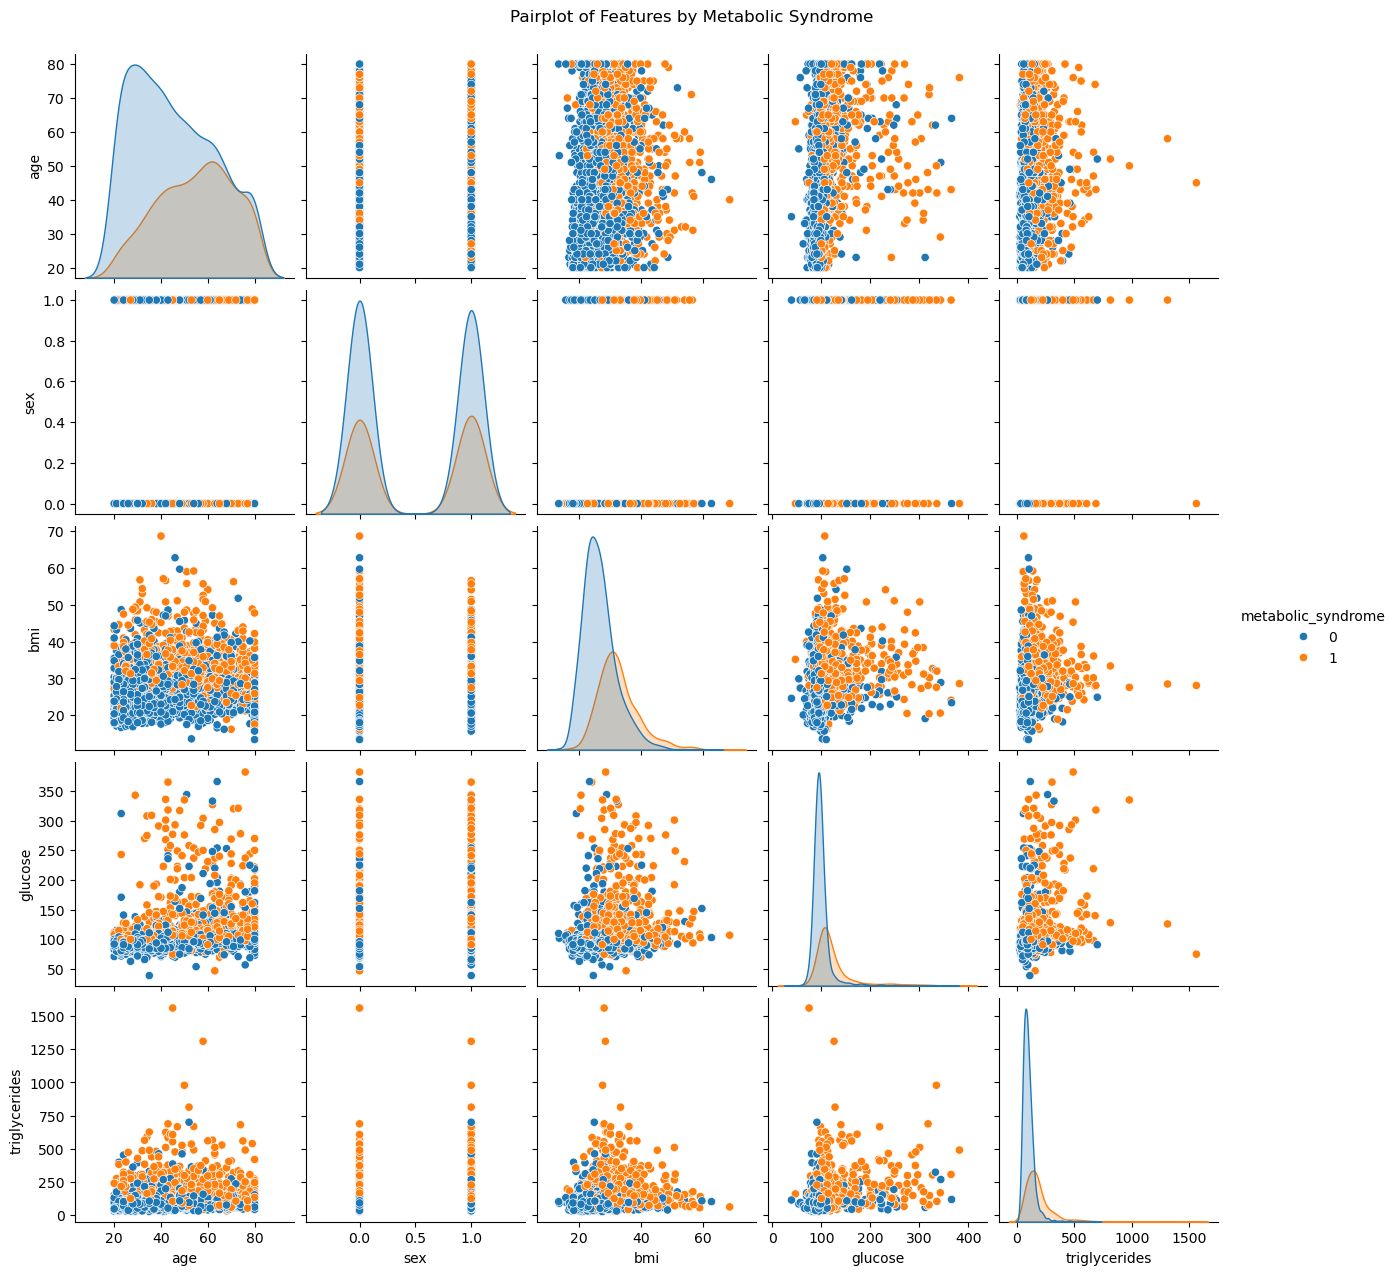

In [176]:
# EDA (Optional)
sns.pairplot(df, hue='metabolic_syndrome')
plt.suptitle("Pairplot of Features by Metabolic Syndrome", y=1.02)
plt.show()


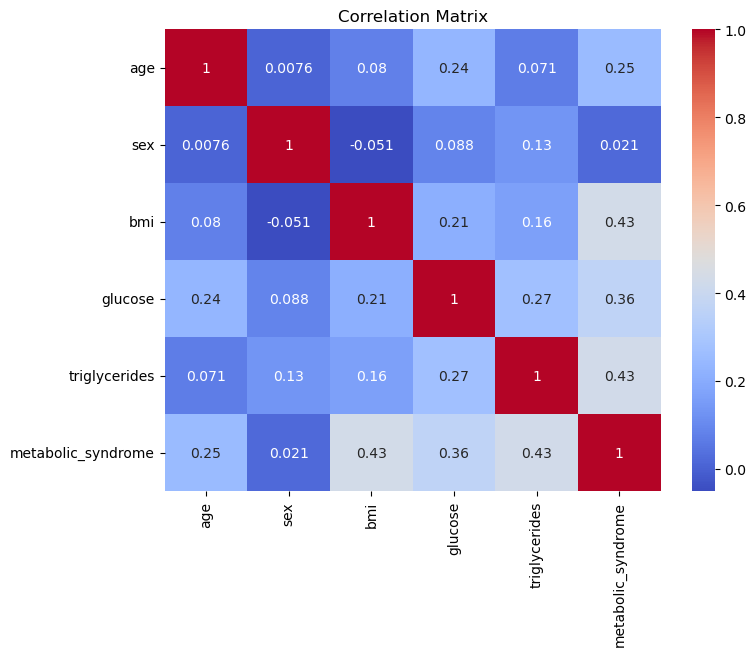

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [29]:
# Define Features and Target
X = df[['age', 'sex', 'bmi', 'glucose', 'triglycerides']]
y = df['metabolic_syndrome']

In [33]:
#  Train the Model
model = HistGradientBoostingClassifier(random_state=42);
model.fit(X, y)

HistGradientBoostingClassifier(random_state=42)

In [37]:
# Save the Model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model trained and saved as model.pkl")

Model trained and saved as model.pkl
